In [31]:
# импорт библитек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special

In [4]:
# читаем файл
df = pd.read_csv('6 class csv.csv')
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.loc[(df['Star color']=='Red'), 'Star color'] = 1
df.loc[((df['Star color']=='Blue white ') | (df['Star color']=='Blue ') | (df['Star color']=='Blue') | (df['Star color']=='Blue-white') | (df['Star color']=='Blue White') | (df['Star color']=='Blue white') | (df['Star color']=='Blue') | (df['Star color']=='Blue-White')), 'Star color'] =  5
df.loc[(df['Star color']=='yellow-white') | (df['Star color']=='Yellowish White') | (df['Star color']=='yellowish') | (df['Star color']=='Yellowish') | (df['Star color']=='White-Yellow') | (df['Star color']=='Blue'), 'Star color'] = 3
df.loc[((df['Star color']=='White') | (df['Star color']=='white') | (df['Star color']=='Whitish')), 'Star color'] =  4
df.loc[((df['Star color']=='Orange') | (df['Star color']=='Orange-Red') | (df['Star color']=='Pale yellow orange')), 'Star color'] =  2

In [7]:
df.loc[(df['Spectral Class']=='O'), 'Spectral Class'] = 1
df.loc[(df['Spectral Class']=='B'), 'Spectral Class'] = 2
df.loc[(df['Spectral Class']=='A'), 'Spectral Class'] = 3
df.loc[(df['Spectral Class']=='F'), 'Spectral Class'] = 4
df.loc[(df['Spectral Class']=='G'), 'Spectral Class'] = 5
df.loc[(df['Spectral Class']=='K'), 'Spectral Class'] = 6
df.loc[(df['Spectral Class']=='M'), 'Spectral Class'] = 7

In [8]:
df = df.astype('float')
X = df.drop('Star type', axis=1)
Y = df['Star type']
X = (X-X.min())/(X.max()-X.min()) * 0.99998 + 0.00001

In [9]:
tr_s = int(X.shape[0]*0.7)
X_train = X[:tr_s]
y_train = Y[:tr_s]
X_valid = X[tr_s:].reset_index(drop=True)
Y_valid = Y[tr_s:].reset_index(drop=True)

<AxesSubplot:>

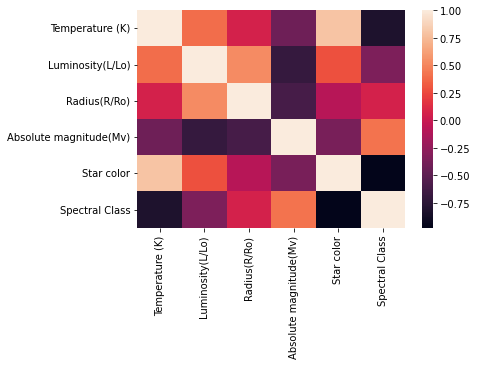

In [36]:
sns.heatmap(X.corr())

In [10]:
class Net:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        self.inodes = input_nodes
        self.hnodes = hidden_nodes
        self.onodes = output_nodes
        self.lr = learning_rate
        self.wih = (np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes,self.inodes)))
        self.who = (np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes,self.hnodes)))
        
        self.activation = lambda x: scipy.special.expit(x)
        pass
    
    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)
        
        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)
        self.who += self.lr*np.dot((output_errors*final_outputs*(1-final_outputs)),np.transpose(hidden_outputs))
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation(hidden_inputs)
        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation(final_inputs)
        
        return final_outputs

In [11]:
n = Net(6, 10, 6, 0.5)

In [23]:
for j in range(100):
    for i in range(X.shape[0]):
        target = np.zeros(6) + 0.001
        target[int(Y[i])] = 0.999
        n.train(X.iloc[i], target)

In [30]:
cnt = 0
for i in range(X_valid.shape[0]):
    if np.argmax(n.query(X_valid.iloc[i]))==Y_valid[i]:
        cnt += 1
cnt/X_valid.shape[0]

1.0